Atharva Kulkarni

atharva.kulkarni@columbia.edu

The task is to conduct exploratory data analysis (EDA) on this dataset to gain insights into the charging patterns.



In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime
import seaborn as sns

In [2]:
#loading the data
df = pd.read_csv("Charging_events_data - charging_events_meter_reading.csv")
df.head(10)

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,24.08.2018 09:50,50,50.00,0.00,37,NaN
1,24.08.2018 09:51,50,50.00,0.00,38,NaN
2,24.08.2018 09:51,73,118.52,45.52,56,NaN
3,24.08.2018 09:53,105,116.66,11.66,76,NaN
4,24.08.2018 09:54,121,144.77,23.77,19,NaN
5,24.08.2018 09:54,132,132.00,0.00,18,NaN
6,27.08.2018 09:16,39,483.18,444.18,515,NaN
7,27.08.2018 09:24,507,547.25,40.25,48,NaN
8,27.08.2018 09:25,537,1551.37,1014.37,1052,NaN
9,29.08.2018 08:01,1546,2290.81,744.81,0,charger_3


# Descriptive Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Time          277 non-null    object 
 1   Meter Start (Wh)    277 non-null    int64  
 2   Meter End(Wh)       277 non-null    float64
 3   Meter Total(Wh)     277 non-null    float64
 4   Total Duration (s)  277 non-null    int64  
 5   Charger_name        264 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 13.1+ KB


There are 6 columns. 4 numericals (Meter Start, Meter End, Meter Total, Total Duration) and 2 categorical (Start time: will be converted into date time, Charger_name)

In [4]:
df.describe()

,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s)
count,2.770000e+02,2.770000e+02,277.000000,2.770000e+02
mean,3.968875e+05,4.030848e+05,6197.316318,9.651005e+04
std,3.912772e+05,3.892371e+05,12260.182878,3.472706e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,6.900900e+04,7.866592e+04,0.000000,1.200000e+01
50%,1.932000e+05,2.007288e+05,1380.280000,5.704000e+03
75%,7.430480e+05,7.508278e+05,6822.500000,7.343900e+04
max,1.204911e+06,1.204935e+06,126350.920000,3.020411e+06


In [5]:
df.nunique()

Start Time            265
Meter Start (Wh)      237
Meter End(Wh)         263
Meter Total(Wh)       199
Total Duration (s)    205
Charger_name           16
dtype: int64

In [6]:
df.duplicated().sum()

0

# Data Preprocessing

#### Inconsitent data

We filter the data where either total duration is 0 or the energy consumed is 0, as it's not possible to have data points where there is a change in energy consumption and in no time (0 seconds) or no change in energy consumption in some time (greater than 0 seconds). This shows that the data is either wrongly collected or there is some error during that charging instance.

In [7]:
#filtering out inconsistent data based on intution
data = df[(df['Total Duration (s)'] != 0) | (df['Meter Total(Wh)'] != 0)]
data

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,24.08.2018 09:50,50,50.00,0.00,37,NaN
1,24.08.2018 09:51,50,50.00,0.00,38,NaN
2,24.08.2018 09:51,73,118.52,45.52,56,NaN
3,24.08.2018 09:53,105,116.66,11.66,76,NaN
4,24.08.2018 09:54,121,144.77,23.77,19,NaN
...,...,...,...,...,...,...
272,09.09.2019 05:47,0,33101.51,33101.51,6906,charger_1
273,11.09.2019 14:05,0,13807.38,13807.38,3726,charger_1
274,12.09.2019 11:05,0,35804.92,35804.92,7234,charger_1
275,16.09.2019 07:17,0,32996.70,32996.70,5240,charger_1


In [8]:
data.shape

(232, 6)

We are left with 232 data points after filtering out.

##### Missing Value Analysis

In [9]:
#finding out amount of missing values
round(data.isnull().mean() * 100,2)

Start Time            0.0
Meter Start (Wh)      0.0
Meter End(Wh)         0.0
Meter Total(Wh)       0.0
Total Duration (s)    0.0
Charger_name          5.6
dtype: float64

Around 5-6% of the charger name are not known in the dataset. There are various ways to deal with these missing values.


1.   Replacing 'NaN' with 'Unknown'
2.   Imputing with mode




In [10]:
# filling NA values as 'Unknown'
data['Charger_name'] = data['Charger_name'].fillna('Unknown')

<ipython-input-10-5272590d4557>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Charger_name'] = data['Charger_name'].fillna('Unknown')


In [11]:
data['Charger_name'].value_counts()

Charger_name
charger_4     53
charger_3     35
charger_2     28
charger_8     21
Unknown       13
charger_11    13
charger_5     10
charger_6      9
charger_14     8
charger_15     7
charger_9      7
charger_10     6
charger_13     6
charger_12     6
charger_1      6
charger_16     3
charger_7      1
Name: count, dtype: int64

#### Date time data handling

In [12]:
# converting timestamp to datetime
data['Start Time'] = pd.to_datetime(data['Start Time'], format = '%d.%m.%Y %H:%M', errors= 'coerce')
#data['Start Time'] = data['Start Time'].dt.strftime('%m-%d-%Y %H:%M')

<ipython-input-12-221fcc4286f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Start Time'] = pd.to_datetime(data['Start Time'], format = '%d.%m.%Y %H:%M', errors= 'coerce')


In [13]:
# creating new columns to get day and month
data['Day of Week'] = data['Start Time'].dt.day_name()
data['Month'] = data['Start Time'].dt.month

<ipython-input-13-9e05d2224233>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day of Week'] = data['Start Time'].dt.day_name()
<ipython-input-13-9e05d2224233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Start Time'].dt.month


In [14]:
#creating new column 'time slot' based on the start time
def time_slot(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

data['Time Slot'] = data['Start Time'].apply(time_slot)

<ipython-input-14-1c9fa37c870a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time Slot'] = data['Start Time'].apply(time_slot)


In [15]:
#new column to get duraion in hours
data['Total Time (hr)'] = data['Total Duration (s)'] / 3600

<ipython-input-15-38872a840271>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Time (hr)'] = data['Total Duration (s)'] / 3600


# Visualization

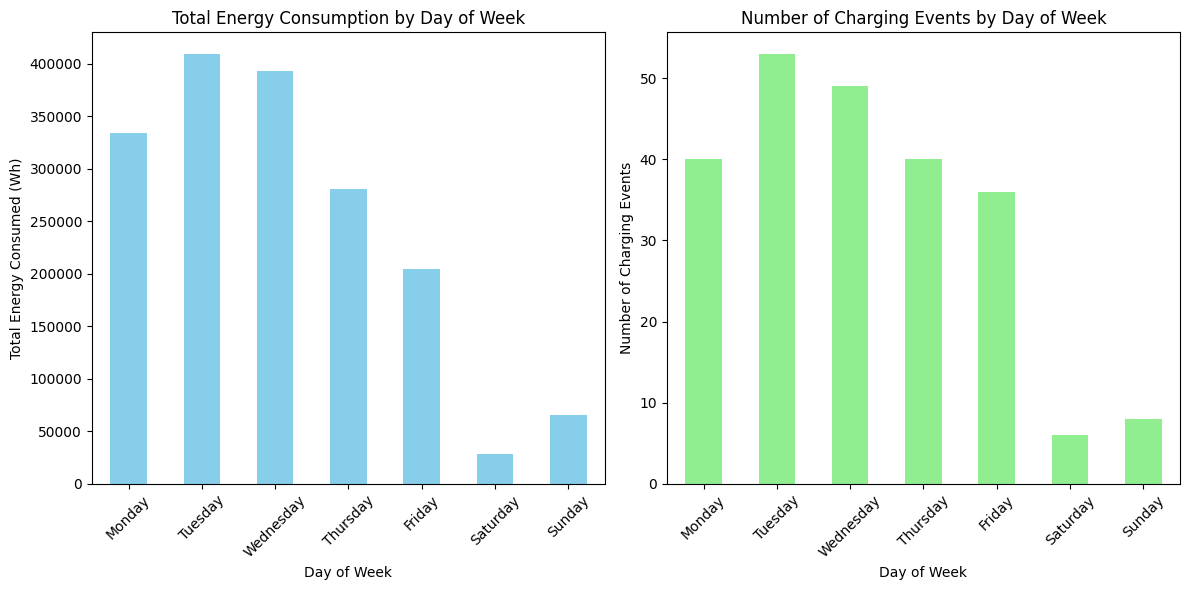

In [16]:
#plotting weekly energy and # of charging instances per day of the week
weekly_energy = data.groupby('Day of Week')['Meter Total(Wh)'].sum()
weekly_events = data.groupby('Day of Week').size()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
weekly_energy.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', color = 'skyblue')
plt.title('Total Energy Consumption by Day of Week')
plt.ylabel('Total Energy Consumed (Wh)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
weekly_events.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', color = 'lightgreen')
plt.title('Number of Charging Events by Day of Week')
plt.ylabel('Number of Charging Events')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

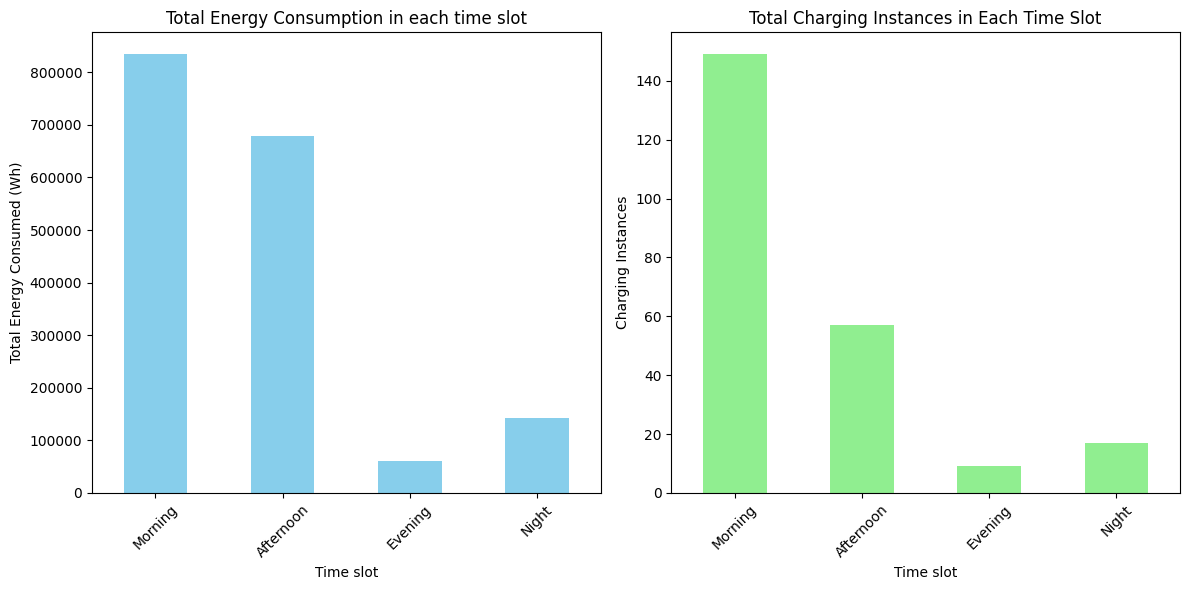

In [17]:
#plotting daily energy and # of charging instances per time slot

ts_energy = data.groupby('Time Slot')['Meter Total(Wh)'].sum()
ts_events = data.groupby('Time Slot').size()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ts_energy.reindex(["Morning", "Afternoon", "Evening", "Night"]).plot(kind='bar', color = 'skyblue')
plt.title('Total Energy Consumption in each time slot')
plt.ylabel('Total Energy Consumed (Wh)')
plt.xlabel('Time slot')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
ts_events.reindex(["Morning", "Afternoon", "Evening", "Night"]).plot(kind='bar',  color='lightgreen')
plt.title('Total Charging Instances in Each Time Slot')
plt.ylabel('Charging Instances')
plt.xlabel('Time slot')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

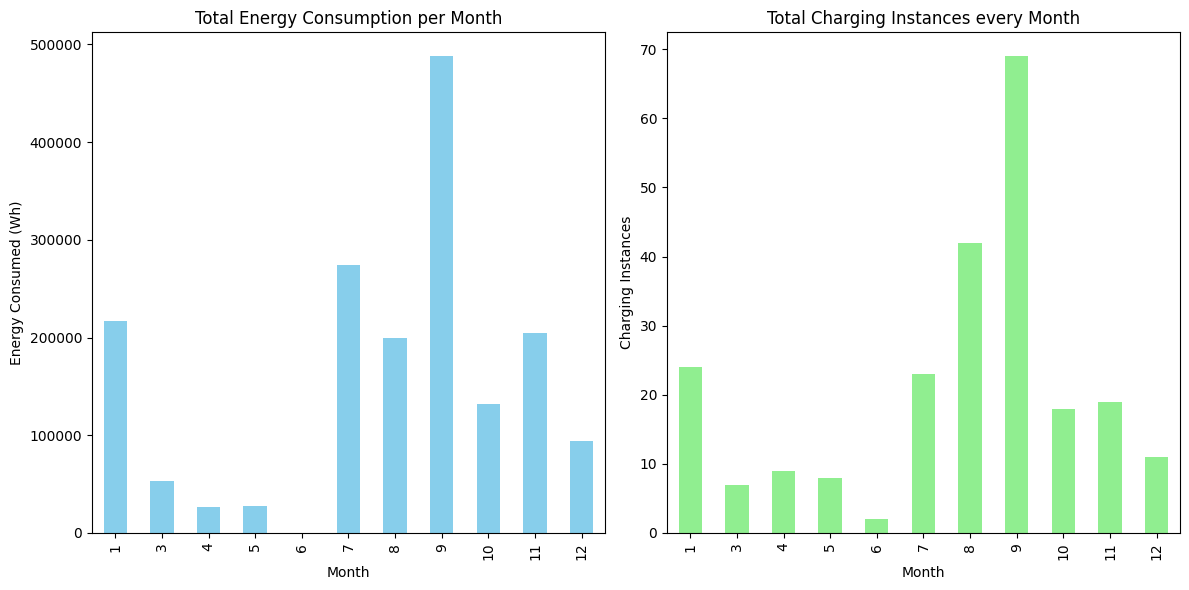

In [18]:
#plotting monthly energy and # of charging instances
m_energy = data.groupby('Month')['Meter Total(Wh)'].sum()
m_events = data.groupby('Month').size()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
m_energy.plot(kind='bar', color='skyblue')
plt.title('Total Energy Consumption per Month')
plt.ylabel('Energy Consumed (Wh)')
plt.xlabel('Month')

plt.subplot(1, 2, 2)
m_events.plot(kind='bar', color='lightgreen')
plt.title('Total Charging Instances every Month')
plt.ylabel('Charging Instances')
plt.xlabel('Month')

plt.tight_layout()
plt.show()

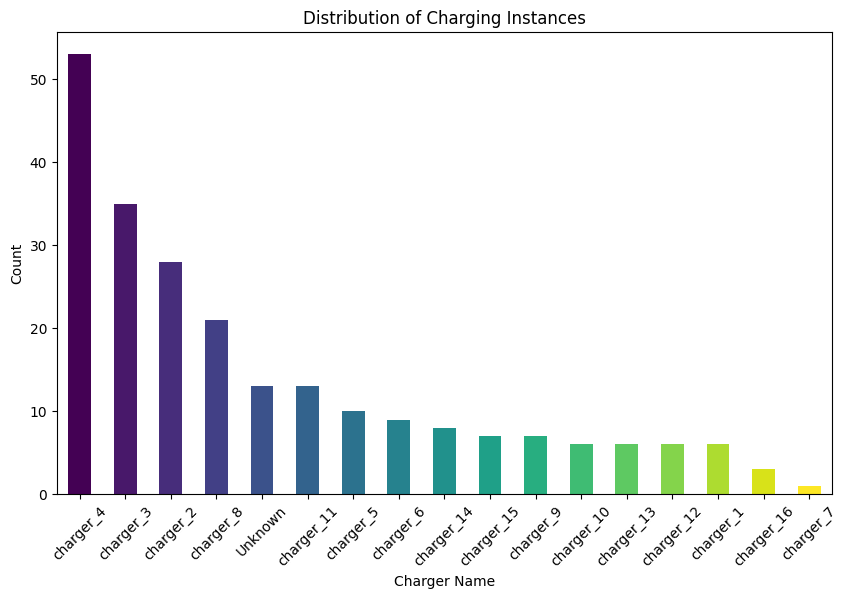

In [19]:
#dist of charging events
charger_names = data['Charger_name'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(charger_names)))

plt.figure(figsize=(10, 6))
data['Charger_name'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Charging Instances')
plt.xlabel('Charger Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [20]:
data['Total Duration (s)'].describe()

count    2.320000e+02
mean     1.152297e+05
std      3.767272e+05
min      0.000000e+00
25%      9.547500e+02
50%      1.519700e+04
75%      8.036475e+04
max      3.020411e+06
Name: Total Duration (s), dtype: float64

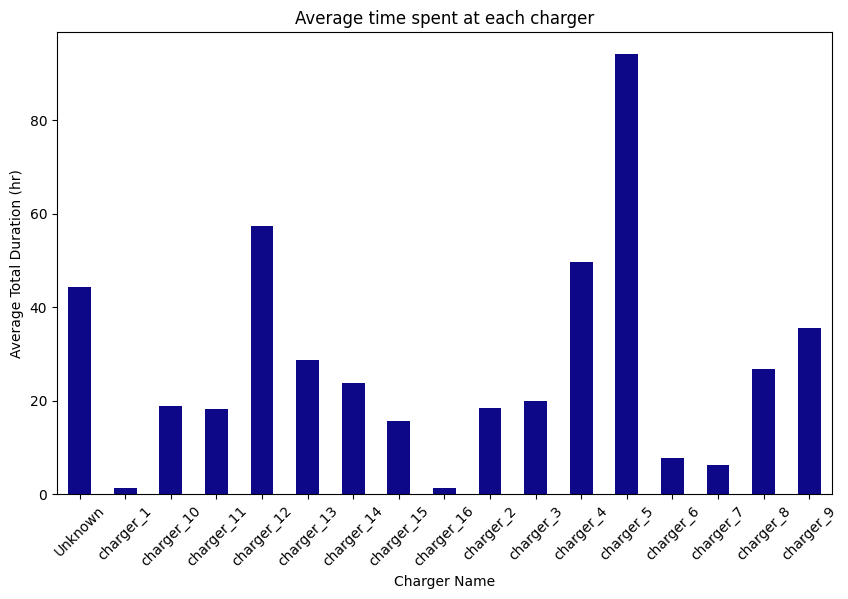

In [21]:
# plotting avg time spent at each charger
plt.figure(figsize=(10, 6))
data.groupby('Charger_name')['Total Time (hr)'].mean().plot(kind='bar', cmap='plasma')
plt.title('Average time spent at each charger')
plt.xlabel('Charger Name')
plt.ylabel('Average Total Duration (hr)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-22-5aadb32209ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cumulative Energy'] = data['Meter Total(Wh)'].cumsum()


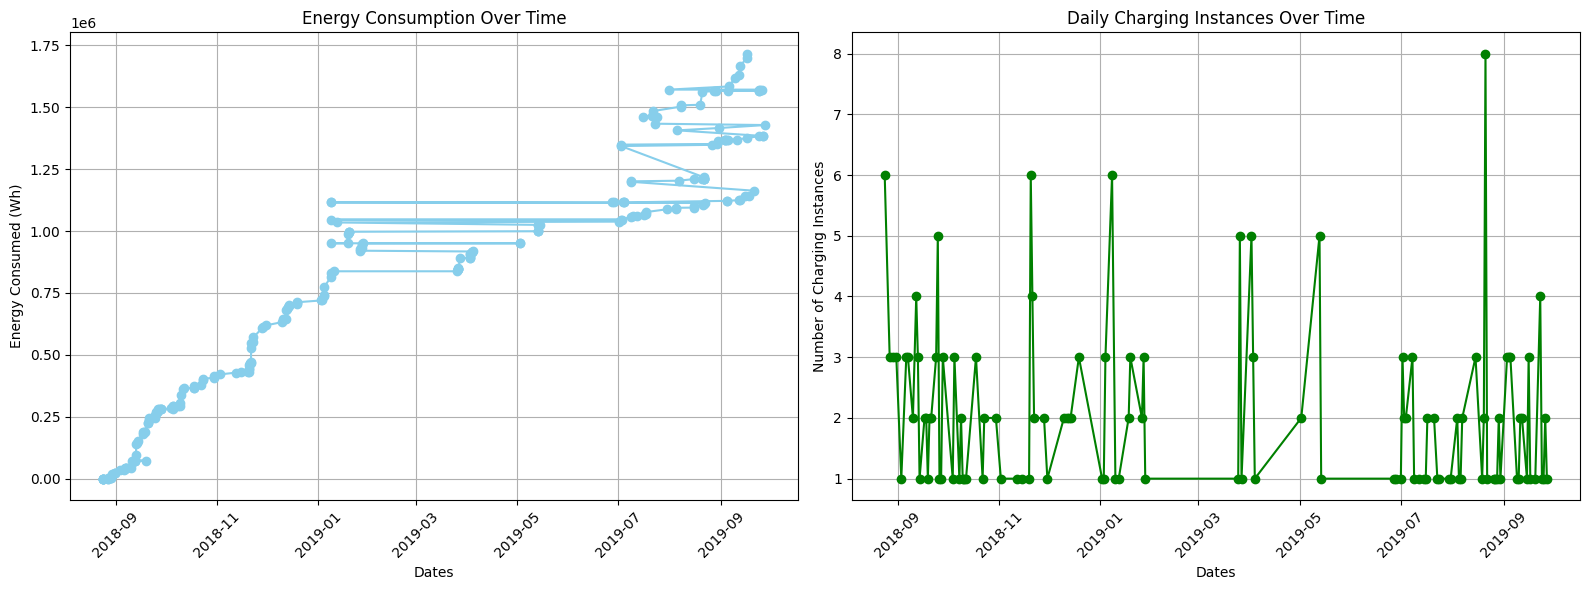

In [22]:
#plotting cumulative energy consumption and daily charging events over time
data['Cumulative Energy'] = data['Meter Total(Wh)'].cumsum()
daily_charges = data['Start Time'].dt.date.value_counts().sort_index()

plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.plot(data['Start Time'], data['Cumulative Energy'], marker='o', linestyle='-', color='skyblue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Dates')
plt.ylabel('Energy Consumed (Wh)')
plt.grid(True)
plt.xticks(rotation=45)


plt.subplot(1,2,2)
plt.plot(daily_charges.index, daily_charges, marker='o', linestyle='-', color='g')
plt.title('Daily Charging Instances Over Time')
plt.xlabel('Dates')
plt.ylabel('Number of Charging Instances')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-23-33132c8da6cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Meter Total(Wh)'] = data['Meter Total(Wh)'].astype(int)
<ipython-input-23-33132c8da6cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Duration (s)'] = data['Total Duration (s)'].astype(int)


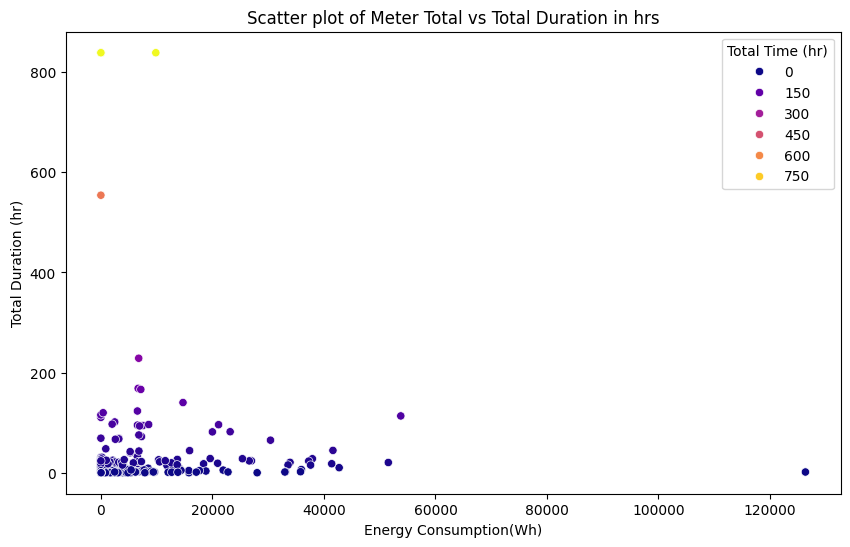

In [23]:
# energy vs time scatter plot
data['Meter Total(Wh)'] = data['Meter Total(Wh)'].astype(int)
data['Total Duration (s)'] = data['Total Duration (s)'].astype(int)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Meter Total(Wh)'], y=data['Total Time (hr)'], hue=data['Total Time (hr)'],
                palette='plasma', legend='brief', data=data)
plt.title('Scatter plot of Meter Total vs Total Duration in hrs')
plt.xlabel('Energy Consumption(Wh)')
plt.ylabel('Total Duration (hr)')
plt.show()

In [24]:
# calculating outliers in duration and consumption using IQR
Q1_duration = data['Total Time (hr)'].quantile(0.25)
Q3_duration = data['Total Time (hr)'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

Q1_energy = data['Meter Total(Wh)'].quantile(0.25)
Q3_energy = data['Meter Total(Wh)'].quantile(0.75)
IQR_energy = Q3_energy - Q1_energy

outliers_duration = data[(data['Total Time (hr)'] < (Q1_duration - 1.5 * IQR_duration)) | (data['Total Time (hr)'] > (Q3_duration + 1.5 * IQR_duration))]
outliers_energy = data[(data['Meter Total(Wh)'] < (Q1_energy - 1.5 * IQR_energy)) | (data['Meter Total(Wh)'] > (Q3_energy + 1.5 * IQR_energy))]

outliers_duration.shape, outliers_energy.shape


((29, 11), (27, 11))

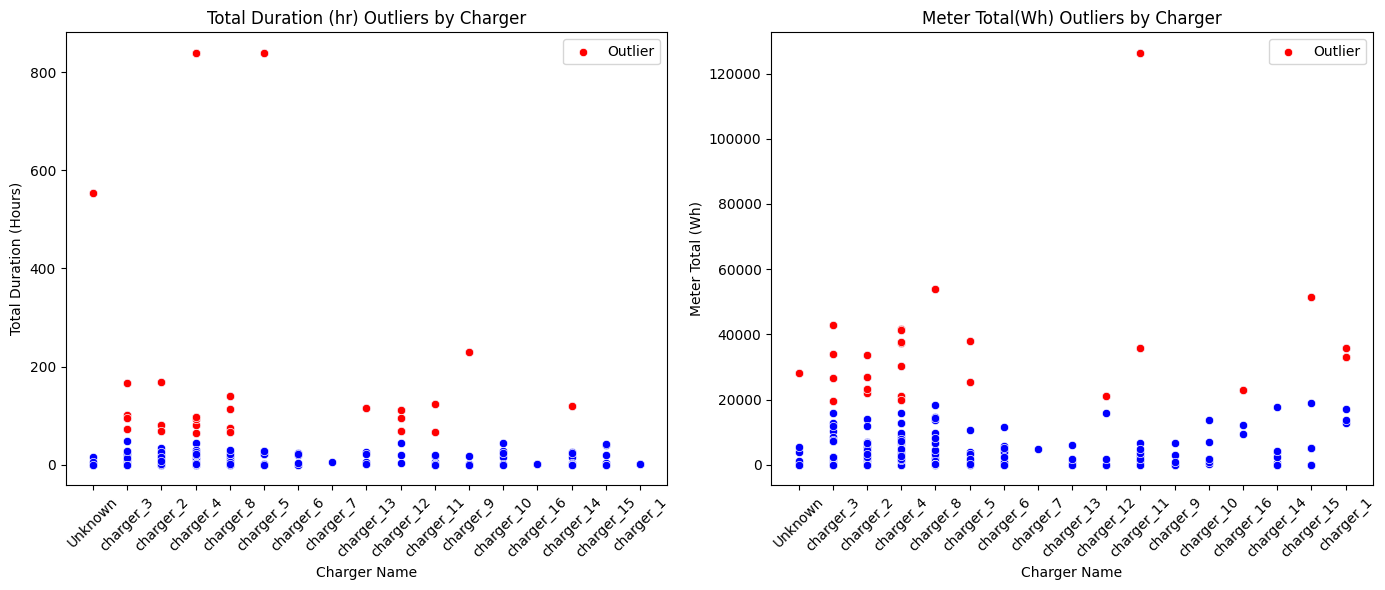

In [25]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Charger_name', y='Total Time (hr)', data=data, color='blue')
sns.scatterplot(x='Charger_name', y='Total Time (hr)', data=outliers_duration, color='red', label='Outlier')
plt.title('Total Duration (hr) Outliers by Charger')
plt.ylabel('Total Duration (Hours)')
plt.xlabel('Charger Name')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x='Charger_name', y='Meter Total(Wh)', data=data, color='blue')
sns.scatterplot(x='Charger_name', y='Meter Total(Wh)', data=outliers_energy, color='red', label='Outlier')
plt.title('Meter Total(Wh) Outliers by Charger')
plt.ylabel('Meter Total (Wh)')
plt.xlabel('Charger Name')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()